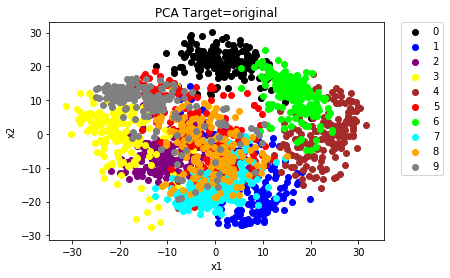

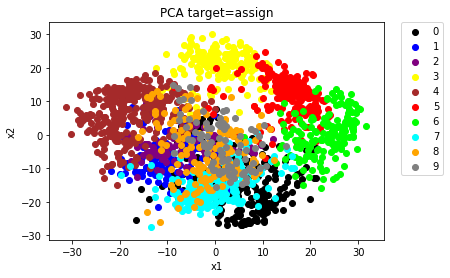

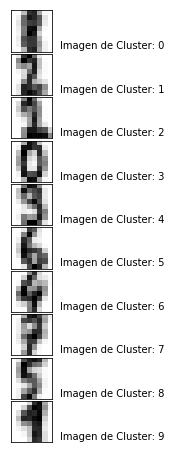

In [18]:
from sklearn import datasets
import math
from random import randint
import matplotlib.pyplot as plt
import pandas as pd
from numpy import asarray
from sklearn.decomposition import PCA

#Se carga el dataset
digits = datasets.load_digits()

#Clase Kmeans
class Kmeans:
    #Atributos de la clase
    nn=0 #filas del de dataset
    mm=0 #num cols de dataset
    kk=0 #num clusters
    nchg=0 #variable que controla el cambio de posiciones de los datos
    data =[] #matriz contenedora del dataset
    means =[] #matriz contenedora de los centroides (numero de clusters)
    assign = [] #vector de membresias
    count =  [] #vector de calculos de cluster

    
    #constructor de la clase, recibe el dataset y el numero de clusters a generar como parametros
    def __init__(self, data, kk):
        self.data=data
        self.nn= data.shape[0]
        self.kk = kk
        self.nchg = data.shape[0]
        self.mm = data.shape[1]
        self.assign = [0 for x in range(self.nn)]
        self.count = [0 for x in range(self.kk)]
        self.initMeans()
        while self.nchg > 0:
            self.estep()
            self.mstep()
    
    #se inicializa el array contenedor de las posiciones de los centroides (matriz) con valores random de 0 a 16 (lo cual; casa centroide representa una imagen o las posiciones iniciales de estos)
    def initMeans(self):
        self.means = [[0 for x in range(self.mm)] for y in range(self.kk)]
        for i in range(0,self.kk):
            for j in range(0,self.mm):
                self.means[i][j] = randint(0,16)
                
    #Definicion del metodo estep el cual verifica los cambios de posiciones de los datos del dataset y actualiza sus membresias
    def estep(self):
        k=0
        m=0
        n=0
        kmin=0
        dmin=0.0
        d=0.0
        self.nchg=0
        for k in range(0,self.kk):
            self.count[k]=0
        for n in range(0,self.nn):
            dmin=999999999999999
            for k in range(0,self.kk):
                d=0
                for m in range(0,self.mm):
                    if((self.data[n][m] - self.means[k][m]) < 0):
                        d = d + math.sqrt((self.data[n][m] - self.means[k][m]) * -1)
                    else:
                        d = d + math.sqrt((self.data[n][m] - self.means[k][m]))
                if d < dmin:
                    dmin = d
                    kmin = k
            if kmin != self.assign[n]:
                self.nchg=self.nchg+1
            self.assign[n] = kmin
            self.count[kmin] = self.count[kmin]+1
        return self.nchg
    
    #Definicion del metodo mstep
    def mstep(self):
        global nchg, kk, nn, mm, assign, means, data,count
        n=0
        k=0
        m=0
        for k in range(0,self.kk):
            for m in range(0,self.mm):
                self.means[k][m]=0
        for n in range(0,self.nn):
            for m in range(0,self.mm):
                self.means[self.assign[n]][m] = self.means[self.assign[n]][m] + self.data[n][m]
        for k in range(0,self.kk):
            if(self.count[k]>0):
                for m in range(0,self.mm):
                    self.means[k][m] = self.means[k][m] / self.count[k]
    
    #metodo que retorna el array de membresias
    def getAssign(self):
        return self.assign
    
    #metodo que retorna las posiciones finales de los centroides (o imagenes finales)
    def getMeans(self):
        return self.means

#Instancia de la clase kmeans, se ingresa el dataset digits y 10 como numero de clusters como parametros
kmeans = Kmeans(digits.data, 10)
#Se obtiene el array de membresia
membresia = kmeans.getAssign()


#Array contenedor de los colores de los targets
colors = ['black', 'blue', 'purple', 'yellow', 'brown',
          'red', 'lime', 'cyan', 'orange', 'gray']

#Reduccion de dimensiones con PCA
pca = PCA(n_components=2)
#fit and transform the data to the model
reduce_data_pca = pca.fit_transform(digits.data)
#visualizacion de la reduccion de componentes a digits con los targets originales
%matplotlib inline
for i in range(len(colors)):
    x = reduce_data_pca[:,0][digits.target==i]
    y= reduce_data_pca[:,1][digits.target==i]
    plt.scatter(x,y,c=colors[i])
    plt.legend(digits.target_names,bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("PCA Target=original")
plt.show()

#se convierte el array contenedor de las membresias (matriz)
membresia = asarray(membresia)
#visualizacion de la reduccion de componentes a digits pero con los targets de las membresias generados por kmeans
for i in range(len(colors)):
    x = reduce_data_pca[:,0][membresia==i]
    y= reduce_data_pca[:,1][membresia==i]
    plt.scatter(x,y,c=colors[i])
    plt.legend(digits.target_names,bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("PCA target=assign")
plt.show()

#se obtiene el array de las posiciones finales de los centroides o imagenes finales (matriz)
centroides = kmeans.getMeans()
#conversion de esta a matriz numpy
centroides = asarray(centroides)

#metodo drawMatrix que recibe como parametros el numero de filas de imagenes x el nmero de columnas de imagenes
#convierte la matriz de centroides en imagenes (una imagen x centroide)
def drawMatrix(n,m):
    global centroides
    #conversion de la matriz de centroides finales a dataframe para visualizacion de imagenes de cada fila de cada uno
    centroides = pd.DataFrame(centroides)
    dig_mat = [[0 for x in range(8)] for y in range(8)] 
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for x in range(0,n*m):
        for i in range(0,8):
            for j in range(0,8):
                dig_mat[i][j]= centroides.loc[x,i*8+j]
        ax = fig.add_subplot(n, m, x + 1, xticks=[], yticks=[])
        ax.imshow(dig_mat, cmap=plt.cm.binary, interpolation='none')
        ax.text(9, 7, "Imagen de Cluster: "+str(x))
    plt.show()

#Dibujado de los centroides finales (imagenes) con el metodo drawMatrix, generaria 10 imagenes (numero de centroides)
drawMatrix(10,1)


        
    
